# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.129  1  0.200 0.655 0.001   
                             age        0.114  1  0.177 0.675 0.001   
                             Kiel       2.252  1  3.496 0.063 0.018   
                             Magdeburg  5.867  1  9.108 0.003 0.046   
                             Sweden     9.006  1 13.982 0.000 0.068   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.000  1  0.000 0.990 0.000   
                             age        0.866  1  0.934 0.335 0.005   
                             Kiel       0.015  1  0.016 0.900 0.000   
                             Magdeburg  2.539  1  2.738 0.100 0.014   
                             Sweden    16.023  1 17.278 0.000 0.083   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.184  0.777    False  
                             age               0.171  0.792    False  
                             Kiel              1.200  0.145    False  
                             Magdeburg         2.539  0.012     True  
                             Sweden            3.613  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.004  0.994    False  
                             age               0.475  0.500    False  
                             Kiel              0.046  0.943    False  
                             Magdeburg         1.002  0.208    False  
                             Sweden            4.312  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.612  1  3.750 0.054 0.019   
                             age        0.010  1  0.063 0.802 0.000   
                             Kiel       0.412  1  2.524 0.114 0.013   
                             Magdeburg  0.995  1  6.095 0.014 0.031   
                             Sweden     2.438  1 14.928 0.000 0.072   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         3.014  1  1.795 0.182 0.009   
                             age        1.064  1  0.634 0.427 0.003   
                             Kiel       8.150  1  4.854 0.029 0.025   
                             Magdeburg 14.650  1  8.726 0.004 0.044   
                             Sweden     1.057  1  0.630 0.428 0.003   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.265  0.120    False  
                             age               0.096  0.875    False  
                             Kiel              0.944  0.217    False  
                             Magdeburg         1.841  0.041     True  
                             Sweden            3.816  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.740  0.310    False  
                             age               0.370  0.571    False  
                             Kiel              1.541  0.073    False  
                             Magdeburg         2.452  0.013     True  
                             Sweden            0.368  0.573    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.655         0.184  0.777    False   
                             Kiel      0.063         1.200  0.145    False   
                             Magdeburg 0.003         2.539  0.012     True   
                             Sweden    0.000         3.613  0.001     True   
                             age       0.675         0.171  0.792    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.990         0.004  0.994    False   
                             Kiel      0.900         0.046  0.943    False   
                             Magdeburg 0.100         1.002  0.208    False   
                             Sweden    0.000         4.312  0.000     True   
                             age       0.335         0.475  0.500    False   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.054         1.265  0.120    False  
                             Kiel      0.114         0.944  0.217    False  
                             Magdeburg 0.014         1.841  0.041     True  
                             Sweden    0.000         3.816  0.001     True  
                             age       0.802         0.096  0.875    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.182         0.740  0.310    False  
                             Kiel      0.029         1.541  0.073    False  
                             Magdeburg 0.004         2.452  0.013     True  
                             Sweden    0.428         0.368  0.573    False  
                             age       0.427         0.370  0.571    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.261         2.485     0.337     0.244         2.750     0.310
std       0.303         5.334     0.331     0.298         5.190     0.325
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.328     0.014     0.002         0.364     0.008
50%       0.119         0.924     0.238     0.089         1.052     0.177
75%       0.470         2.446     0.626     0.432         2.694     0.576
max       1.000       144.655     1.000     1.000        85.553     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_34361/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.655         0.184   
A0A024R0T9;K7ER74;P02655                           AD     0.052         1.280   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.066         1.178   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.599         0.223   
A0A075B6H7                                         AD     0.226         0.645   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.153         0.816   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.386         0.414   
S4R3U6                                             AD     0.990         0.004   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.777    False   
A0A024R0T9;K7ER74;P02655                           AD      0.125    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.151    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.730    False   
A0A075B6H7                                         AD      0.379    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.316    False   
Q9Y6X5                                             AD      0.286    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.181    False   
Q9Y6Y9                                             AD      0.550    False   
S4R3U6                                             AD      0.994    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.054         1.265   
A0A024R0T9;K7ER74;P02655                           AD     0.040         1.396   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.295         0.531   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.294         0.531   
A0A075B6H7                                         AD     0.202         0.696   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.106         0.975   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.696         0.158   
S4R3U6                                             AD     0.182         0.740   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.120    False  
A0A024R0T9;K7ER74;P02655                           AD      0.094    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.442    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.442    False  
A0A075B6H7                                         AD      0.336    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.256         1.405     0.338     0.248         1.497     0.320
std       0.293         1.637     0.319     0.289         1.796     0.315
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.011         0.350     0.037     0.009         0.356     0.027
50%       0.119         0.925     0.238     0.105         0.978     0.204
75%       0.447         1.950     0.607     0.441         2.064     0.584
max       1.000        23.317     1.000     0.999        26.291     1.000

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1033,988


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.655         0.184  0.777   
A0A024R0T9;K7ER74;P02655                           0.052         1.280  0.125   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.066         1.178  0.151   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.599         0.223  0.730   
A0A075B6H7                                         0.226         0.645  0.379   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.316   
Q9Y6X5                                             0.153         0.816  0.286   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.181   
Q9Y6Y9                                             0.386         0.414  0.550   
S4R3U6                                             0.990         0.004  0.994   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.054   
A0A024R0T9;K7ER74;P02655                              False 0.040   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.295   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.294   
A0A075B6H7                                            False 0.202   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.106   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.696   
S4R3U6                                                False 0.182   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.265  0.120   
A0A024R0T9;K7ER74;P02655                                   1.396  0.094   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.531  0.442   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.531  0.442   
A0A075B6H7                                                 0.696  0.336   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.302   
Q9Y6X5                                                     0.975  0.205   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.169   
Q9Y6Y9                                                     0.158  0.796   
S4R3U6                                                     0.740  0.310   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    958
PI (yes) - QRILC (yes)   358
PI (no)  - QRILC (yes)    75
PI (yes) - QRILC (no)     30
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_34361/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


PI                                \
                                      p-unc -Log10 pvalue qvalue rejected   
protein groups                                                              
A0A075B6I0                            0.020         1.701  0.059    False   
A0A075B6J9                            0.073         1.135  0.164    False   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2 0.011         1.941  0.037     True   
A0A087WWT2;Q9NPD7                     0.021         1.677  0.061    False   
A0A087X0M8                            0.026         1.581  0.073    False   
...                                     ...           ...    ...      ...   
Q9NZU1                                0.131         0.883  0.256    False   
Q9P0K9                                0.046         1.333  0.114    False   
Q9UJ14                                0.008         2.073  0.029     True   
Q9UMX0;Q9UMX0-2;Q9UMX0-4              0.007         2.177  0.024     True   
Q9UQ52                                0.080         1.094  0.176    False   

                                      QRILC                                \
                                      p-unc -Log10 pvalue qvalue rejected   
protein groups                                                              
A0A075B6I0                            0.002         2.699  0.008     True   
A0A075B6J9                            0.003         2.480  0.012     True   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2 0.031         1.502  0.078    False   
A0A087WWT2;Q9NPD7                     0.005         2.276  0.018     True   
A0A087X0M8                            0.007         2.130  0.024     True   
...                                     ...           ...    ...      ...   
Q9NZU1                                0.011         1.950  0.034     True   
Q9P0K9                                0.010         2.019  0.030     True   
Q9UJ14                                0.030         1.521  0.075    False   
Q9UMX0;Q9UMX0-2;Q9UMX0-4              0.348         0.458  0.496    False   
Q9UQ52                                0.004         2.403  0.014     True   

                                           data  
                                      frequency  
protein groups                                   
A0A075B6I0                                  194  
A0A075B6J9                                  156  
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2       114  
A0A087WWT2;Q9NPD7                           193  
A0A087X0M8                                  189  
...                                         ...  
Q9NZU1                                       72  
Q9P0K9                                      192  
Q9UJ14                                      169  
Q9UMX0;Q9UMX0-2;Q9UMX0-4                     57  
Q9UQ52                                      188  

[105 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.777,0.120,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.125,0.094,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.151,0.442,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.730,0.442,196,PI (no) - QRILC (no)
A0A075B6H7,0.379,0.336,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.316,0.302,197,PI (no) - QRILC (no)
Q9Y6X5,0.286,0.205,173,PI (no) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.181,0.169,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
E7EN89;E9PP67;E9PQ25;F2Z2Y8;Q9H0E2;Q9H0E2-2,0.837,0.001,86,PI (no) - QRILC (yes),0.836
J3KSJ8;Q9UD71;Q9UD71-2,0.779,0.012,51,PI (no) - QRILC (yes),0.767
P07196,0.728,0.041,77,PI (no) - QRILC (yes),0.686
P43004;P43004-2;P43004-3,0.718,0.035,89,PI (no) - QRILC (yes),0.683
Q96EU7,0.711,0.044,142,PI (no) - QRILC (yes),0.666
...,...,...,...,...,...
P20382,0.049,0.058,160,PI (yes) - QRILC (no),0.009
P09211,0.053,0.046,169,PI (no) - QRILC (yes),0.007
Q16706,0.053,0.046,195,PI (no) - QRILC (yes),0.007


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


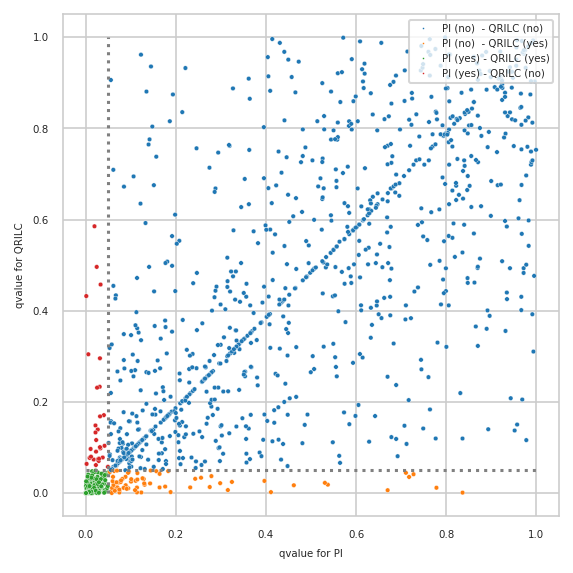

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


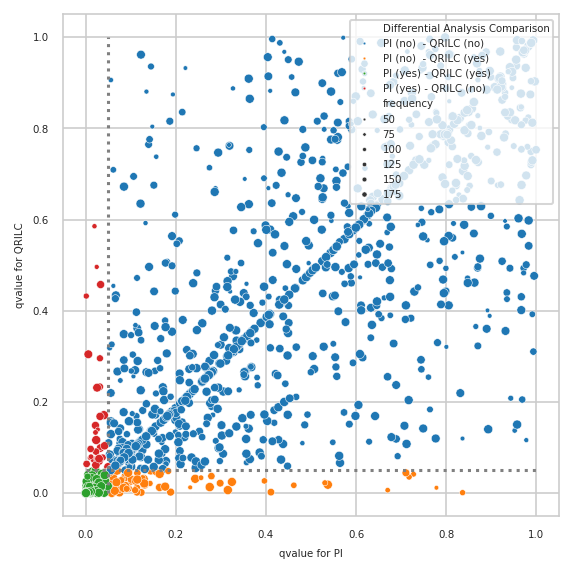

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
APP,ENSP00000284981,5.000
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
MAPT,ENSP00000340820,4.800
...,...,...
U7,U7,0.680
CCDC6,ENSP00000263102,0.680
FOXB1,ENSP00000379369,0.680


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/924ec7e362d761ecf0807b9074d79999_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3587: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out